Based on this vid: https://www.youtube.com/watch?v=15zlr2vJqKc

Models initialization

In [1]:
import torch
import torchvision.models as models

In [2]:
modelDict = {
    'VGG': models.vgg19_bn(pretrained=True),
    'AlexNet': models.alexnet(pretrained=True),
    'ResNet': models.resnet152(pretrained=True),
    'GoogleNet': models.googlenet(pretrained=True),
    'SqueezeNet': models.squeezenet1_1(pretrained=True),
    'DenseNet': models.densenet201(pretrained=True),
    'Inception': models.inception_v3(pretrained=True),
    'MobileNet': models.mobilenet_v3_large(pretrained=True),
    'ResNeXt': models.resnext101_32x8d(pretrained=True),
    'Wide ResNet': models.wide_resnet101_2(pretrained=True),
}

Images

In [3]:
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

images = {
    'Original': Image.open('../Images/cat.jfif'),
    'Blur': Image.open('../Images/filters_cat/cat_blur.jpg'),
    'Engrave': Image.open('../Images/filters_cat/cat_engrave.jpg'),
    'Invert': Image.open('../Images/filters_cat/cat_invert.jpg'),
    'Lines': Image.open('../Images/filters_cat/cat_lines.jpg'),
    'Mozaika': Image.open('../Images/filters_cat/cat_mozaika.jpg'),
    'Pixels': Image.open('../Images/filters_cat/cat_pixels.jpg'),
    'Relief': Image.open('../Images/filters_cat/cat_relief.jpg')
}

Image transformations

In [4]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),             # Resizing image to 256x256 
    transforms.CenterCrop(224),         # Crop the image to 224x224 pixels from center
    transforms.ToTensor(),              # Convert image to PyTorch Tensor data type
    transforms.Normalize(               # Normalizing image
        mean=[0.485, 0.456, 0.406],     # Mean and std same as used on training data
        std=[0.229, 0.224, 0.225]
    )
])

Class names

In [5]:
with open('imagenet_classes.txt') as f:
    classes = [line.split(", ")[1].strip() for line in f.readlines()]

Testing NNs and creating .csv file with result

In [6]:
import csv

result = open('result.csv', 'w')
filewriter = csv.writer(result, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
filewriter.writerow(['Image', 'VGG', 'AlexNet', 'ResNet', 'GoogleNet', 'SqueezeNet', 'DenseNet', 'Inception', 'MobileNet', 'ResNeXt', 'Wide ResNet'])

96

In [7]:
for img in images:
    row = []
    row.append(img)
    img_t = transform(images[img])
    batch_t = torch.unsqueeze(img_t, 0)
    print(img, ":")
    for model in modelDict:
        print("\t", model, ":")
        modelDict[model].eval()
        out = modelDict[model](batch_t)
        _, indices = torch.sort(out, descending=True)
        percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
        found = 0
        for idx in indices[0][:5]:
            print("\t\t", classes[idx], "   ", percentage[idx].item())
            if classes[idx].lower().find("cat") >= 0:
                found = percentage[idx].item()
                break
        row.append(found)
    filewriter.writerow(row)

result.close()
"DONE"

Original :
	 VGG :
		 Siamese_cat     99.96620178222656
	 AlexNet :
		 Siamese_cat     99.69194030761719
	 ResNet :
		 Siamese_cat     99.93289947509766
	 GoogleNet :
		 Siamese_cat     98.69813537597656
	 SqueezeNet :
		 Siamese_cat     99.87576293945312
	 DenseNet :
		 Siamese_cat     99.99434661865234
	 Inception :
		 Siamese_cat     99.97903442382812
	 MobileNet :
		 Siamese_cat     99.9876480102539
	 ResNeXt :
		 Siamese_cat     99.99847412109375
	 Wide ResNet :
		 Siamese_cat     99.93560028076172
Blur :
	 VGG :
		 papillon     11.769244194030762
		 Eskimo_dog     7.586410045623779
		 Cardigan     6.804909706115723
		 Blenheim_spaniel     5.297844886779785
		 Boston_bull     3.3456661701202393
	 AlexNet :
		 Eskimo_dog     5.300934791564941
		 Pekinese     2.6417863368988037
		 Siberian_husky     2.6341145038604736
		 English_foxhound     2.098803758621216
		 remote_control     1.9970662593841553
	 ResNet :
		 Siamese_cat     99.67961883544922
	 GoogleNet :
		 Chihuahua     6.717

'DONE'

Visualize result

In [8]:
import pandas as pd

df = pd.read_csv('result.csv')

<AxesSubplot:xlabel='Image'>

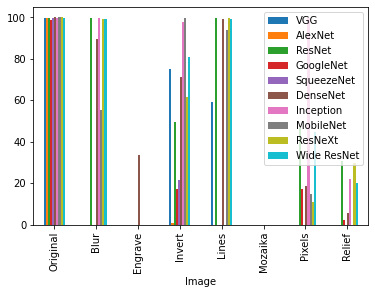

In [9]:
df.plot(x="Image", y=['VGG', 'AlexNet', 'ResNet', 'GoogleNet', 'SqueezeNet', 'DenseNet', 'Inception', 'MobileNet', 'ResNeXt', 'Wide ResNet'], kind="bar")